In [16]:
# Libraries I will be using as part of the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset, titled 'Social Media Sentiments Analysis Dataset,' offers a rich tapestry of human emotions, trends, and interactions as observed across diverse social media platforms. It serves as a snapshot of user-generated content, encapsulating a myriad of elements including textual narratives, timestamps, hashtags, geographic locations, likes, and retweets. By extracting this dataset from www.kaggle.com, we gain access to a wealth of information that sets the stage for comprehensive analysis and insights into the dynamics of social media discourse.

In [17]:
def extract_from_csv(address):
    df = pd.read_csv(address, encoding = 'ISO-8859-1')
    return df

social_media_df = extract_from_csv('sentimentdataset.csv')

# Displaying the variables' names and the first few entries to inform further analysis
social_media_df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! ðª ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [18]:

print(len(social_media_df))

732


I can see there is a lot of text within the data set. The only numerical data is 'Likes' and 'Retweets'. Looking at the top twenty in each category seems a logical place to start.

In [19]:
top_twenty_likes = social_media_df.nlargest(20, 'Likes')
print(top_twenty_likes)

     Unnamed: 0.1  Unnamed: 0  \
335           336         340   
345           346         350   
355           356         360   
368           369         373   
382           383         387   
402           403         407   
432           433         437   
470           471         475   
481           482         486   
510           511         515   
520           521         525   
530           531         535   
540           541         545   
550           551         555   
560           561         565   
570           571         575   
339           340         344   
347           348         352   
356           357         361   
364           365         369   

                                                  Text         Sentiment  \
335  Thrilled to witness the grandeur of a cultural...    Thrill           
345  Motivated to achieve fitness goals after an in...    Motivation       
355  Anticipation for an upcoming adventure in an e...    Anticipation     
36

In [20]:
top_twenty_retweets = social_media_df.nlargest(20, 'Retweets')
print(top_twenty_retweets)

     Unnamed: 0.1  Unnamed: 0  \
335           336         340   
345           346         350   
355           356         360   
368           369         373   
382           383         387   
402           403         407   
432           433         437   
470           471         475   
481           482         486   
510           511         515   
520           521         525   
530           531         535   
540           541         545   
550           551         555   
560           561         565   
570           571         575   
339           340         344   
347           348         352   
356           357         361   
364           365         369   

                                                  Text         Sentiment  \
335  Thrilled to witness the grandeur of a cultural...    Thrill           
345  Motivated to achieve fitness goals after an in...    Motivation       
355  Anticipation for an upcoming adventure in an e...    Anticipation     
36

In [21]:
social_media_df[['Retweets','Likes']].corr() 

,Retweets,Likes
Retweets,1.000000,0.998482
Likes,0.998482,1.000000


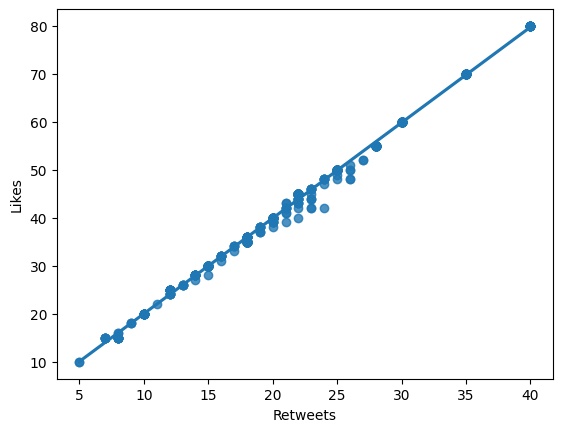

In [22]:
sns.regplot(x="Retweets", y="Likes", data = social_media_df)

# Saving the plot to an image file
plt.savefig('plot1.png')

I can see that the top twenty are the same in both cases. Looking at the Pearson Correlation Coefficient there is a strong linear relationship between the two. Also, there are many different hashtag and sentiment descriptors which makes analysis here difficult. Text variables that are more discrete are 'Platform' and 'Country'.

In [23]:
# Apply strip() function to string columns
social_media_df = social_media_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace "Scotland" with "UK" in the 'Country' column
social_media_df['Country'] = social_media_df['Country'].replace('Scotland', 'UK')

# Get unique values in the 'Country' column
unique_countries = social_media_df['Country'].unique()

# Print unique countries
print(unique_countries)

['USA' 'Canada' 'UK' 'Australia' 'India' 'France' 'Brazil' 'Japan'
 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa' 'Spain'
 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark' 'Czech Republic'
 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia' 'Norway' 'Colombia'
 'Ireland' 'Jamaica' 'Kenya' 'Thailand']


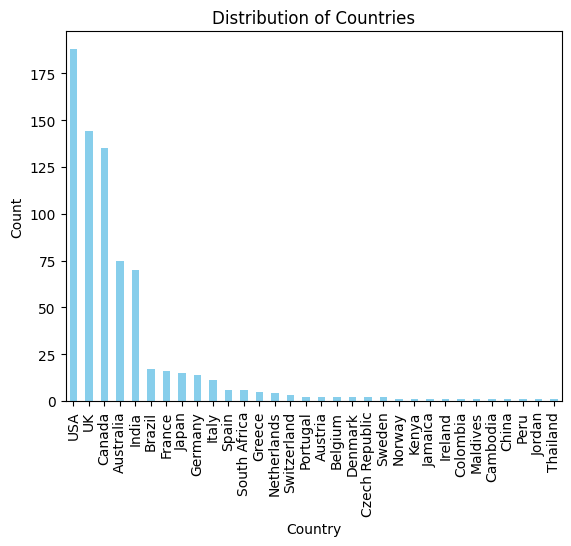

In [24]:
# Count the occurrences of each country
country_counts = social_media_df['Country'].value_counts()

# Plot the bar plot
country_counts.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Distribution of Countries')
plt.xlabel('Country')
plt.ylabel('Count')

# Saving the plot to an image file
plt.savefig('plot2.png')

# Show the plot
plt.show()

From this we can see that although many countries have entries, the majority (over two-thirds) comes from the top 5. This maybe because the platforms we have extracted data from are prosperous in these countries and not in the others. China, for example, has a very small presence here.

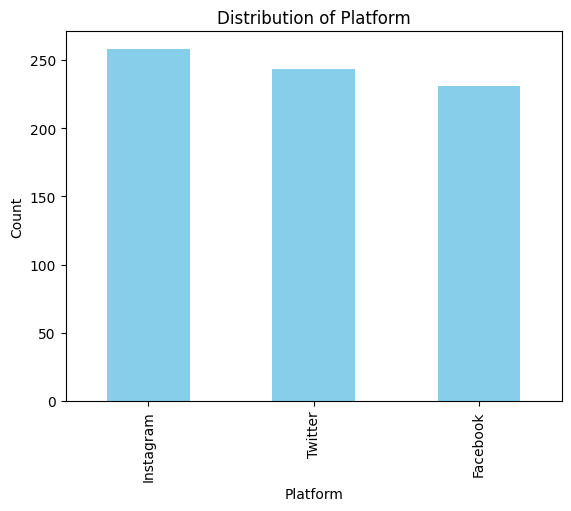

In [25]:
# Count the occurrences of each country
platform_counts = social_media_df['Platform'].value_counts()

# Plot the bar plot
platform_counts.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Distribution of Platform')
plt.xlabel('Platform')
plt.ylabel('Count')

# Saving the plot to an image file
plt.savefig('plot3.png')

# Show the plot
plt.show()

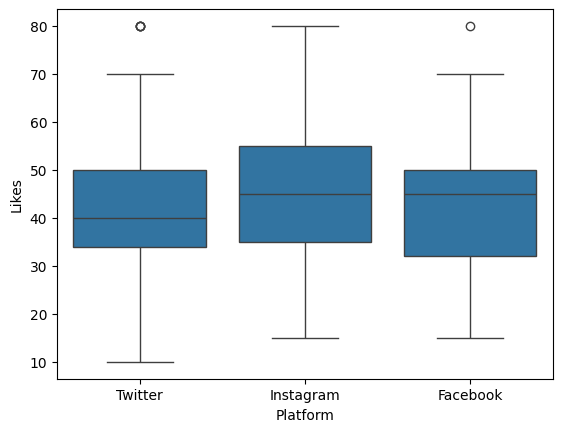

In [26]:
sns.boxplot(x="Platform", y="Likes", data = social_media_df)

# Saving the plot to an image file
plt.savefig('plot4.png')

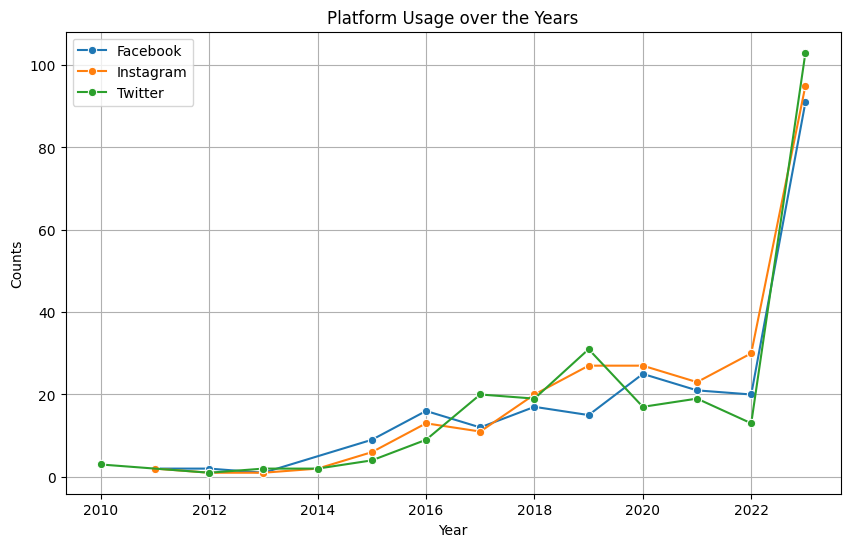

<Figure size 640x480 with 0 Axes>

In [27]:
platform_counts_by_year = social_media_df.groupby(['Platform', 'Year']).size().reset_index(name='Counts')

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=platform_counts_by_year, x='Year', y='Counts', hue='Platform', marker='o')
plt.title('Platform Usage over the Years')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()

# Saving the plot to an image file
plt.savefig('plot5.png')

plt.show()

Several key insights from the data analysis:

**Similar Number of Entries Across Platforms**: The distribution of entries across platforms is relatively consistent, indicating a comparable level of activity on each platform.

**Instagram Receives More Likes**: The boxplot reveals that Instagram posts tend to receive more likes compared to other platforms. Specifically, the top 25% of Instagram posts receive between 55 to 80 likes.

**Twitter is Most Popular Over the Years**: Despite Instagram receiving more likes per post, the analysis of platform usage over the years shows that Twitter is currently the most popular platform.

**Similar Profile Across Platforms**: Despite differences in popularity and engagement metrics, all three platforms exhibit a similar profile, suggesting that users may engage with content similarly across different platforms.

These insights provide valuable information about user behavior and platform dynamics, which can inform strategic decisions related to content creation, platform selection, and audience engagement strategies.


In [28]:
# Selecting relevant columns from the DataFrame
df_gp = social_media_df[['Country','Platform','Likes']]

# Grouping the data by 'Country' and 'Platform', and summing the 'Likes'
group_all = df_gp.groupby(['Country','Platform'], as_index=False).sum()

group_all

,Country,Platform,Likes
0,Australia,Facebook,1056.0
1,Australia,Instagram,1003.0
2,Australia,Twitter,867.0
3,Austria,Facebook,90.0
4,Belgium,Twitter,140.0
5,Brazil,Facebook,290.0
6,Brazil,Instagram,330.0
7,Brazil,Twitter,280.0
8,Cambodia,Instagram,40.0
9,Canada,Facebook,1760.0


In [29]:
# List of countries of interest
countries_of_interest = ['USA', 'UK', 'Canada', 'Australia', 'India']

# Filtering the grouped DataFrame to include only the specified countries
group_all_filtered = group_all[group_all['Country'].isin(countries_of_interest)]

grouped_pivot = group_all_filtered.pivot(index='Country',columns='Platform')
grouped_pivot

Likes                  
Platform  Facebook Instagram Twitter
Country                             
Australia   1056.0    1003.0   867.0
Canada      1760.0    1867.0  1861.0
India        746.0     756.0  1173.0
UK          1613.0    2356.0  1903.0
USA         2517.0    3381.0  2460.0

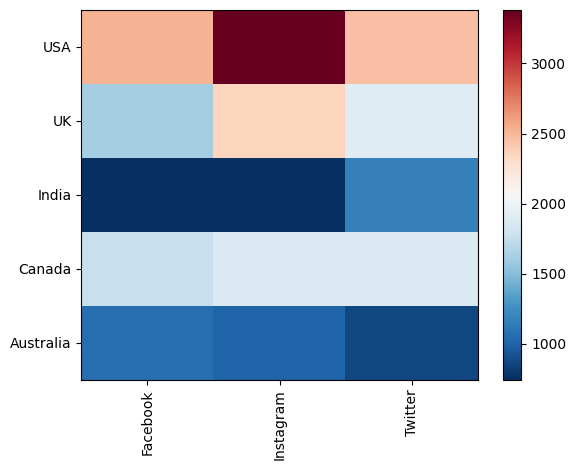

In [30]:
# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Plot the heatmap with a diverging colormap
im = ax.pcolor(grouped_pivot, cmap='RdBu_r')

# Get the row and column labels
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# Set labels for ticks
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate x-axis labels if they are too long
plt.xticks(rotation=90)

# Add colorbar
fig.colorbar(im)

# Saving the plot to an image file
plt.savefig('plot6.png')

# Display the plot
plt.show()

***Final Conclusions:***
- The top five countries for using 'Instagram', 'Twitter', and 'Facebook' are the USA, UK, Australia, Canada, and India.
- There is an incredibly strong linear relationship between 'Likes' and 'Retweets'.
- Usage over the years has been very similar across the platforms
- USA favors 'Instagram' whist Canada has no real preference